### ML/DL HW2 - Data Analysis with NYC Taxi dataset

1. Copy this notebook and solve them by following the instruction.
2. Upload the dataset in your directory before executing this code.
  * Train data (71,514 rows; 2023/01/01-2023/01/23): [Download](https://drive.google.com/file/d/15Ne57MIFPFYgDMpbL5kOly9CjAoZe19r/view?usp=sharing)
  * Test data (28,390 rows; 2023/01/24-2023/01/31): [Download](https://drive.google.com/file/d/15Mi8vm2guvePB7RaY6LPi3fxXOwLFlyw/view?usp=sharing)

3. Note: Your code for all of the programming exercises including this one should be submitted to the corresponding Programming submission slot on Gradescope.

Reference
* https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/NYC%20Taxi%20Trip%20Duration.ipynb

Student ID: 20185163
Name: Hyogeon Jeon(전효건)

In [41]:
!pip install pandas pyarrow
import numpy as np
import pandas as pd
from google.colab import files
files=files.upload()

Saving yellow_tripdata_2023-01_small_test.parquet to yellow_tripdata_2023-01_small_test (1).parquet
Saving yellow_tripdata_2023-01_small_train.parquet to yellow_tripdata_2023-01_small_train (1).parquet


In [45]:
# Check the below cells before fill in your code.

import pyarrow.parquet as pq
import datetime

class Dataset:
  train_x = None  # X (data) of training set.
  train_y = None  # Y (label) of training set.
  test_x = None # X (data) of test set.
  test_y = None # Y (label) of test set.

  def __init__(self):
    self.df_train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
    self.df_test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()
    self.df_train = self.preprocess_data(self.df_train)
    self.df_test = self.preprocess_data(self.df_test)

  def preprocess_data(self, df):
    ### TODO: Preprocess your data (Impute null values; DO NOT drop any test cases)

    mode_ = df.mode().loc[0]
    df = df.fillna(mode_)

    for index in df:
      for n in range(len(df[index])):
        if not df[index][n] and df[index][n] != 0:
          df[index][n] = mode_[index]

    return df

  def time_duration(self, df):
    new = []
    for i in range(len(df['tpep_dropoff_datetime'])):
      a = df['tpep_dropoff_datetime'][i] - df['tpep_pickup_datetime'][i]
      new.append(a.total_seconds())

    return new

  def getdata_linear_reg(self):
    ### Hint: Use self.df_train, self.df_test
    ### Three features (x): Passenger_count, trip_distance, trip_duration (seconds; use tpep_pickup_datetime, tpep_dropoff_datetime)
    ### Target (y): fare_amount
    self.train_x = np.array([self.df_train['passenger_count'], self.df_train['trip_distance'], \
                             self.time_duration(self.df_train)])  ### TODO: YOUR CODE HERE
    self.train_y = np.array(self.df_train['fare_amount'])  ### TODO: YOUR CODE HERE
    self.test_x = np.array([self.df_test['passenger_count'], self.df_test['trip_distance'], \
                            self.time_duration(self.df_test)])  ### TODO: YOUR CODE HERE
    self.test_y = np.array(self.df_test['fare_amount']) ### TODO: YOUR CODE HERE
    return [self.train_x, self.train_y, self.test_x, self.test_y]

  def correlation(self, X, Y):
    ### TODO: Correlation with each features
    return np.corrcoef(X,Y)




# Test Code

Provide some test code with your Linear regression code. Also, Compare with sklearn.LinearRegression().

### 1. Prepare the dataset (8pt)
Load the train and test datasets.

methods:

(1) **preprocess_data(self, df)**: Handle None and null values (2pt)

(2) **getdata_linear_reg(self)**: Separate the features/labels of the train/test set and save them separately in a numpy array format.(4pt)

(3) **correlation(self, X, Y)**: Calculate the correlation between each features and target Y in training set (2pt)



In [46]:
dataset = Dataset()
[train_x, train_y, test_x, test_y] = dataset.getdata_linear_reg()
print(train_x)
print(train_y)
print(test_x)
print(test_y)

dataset.correlation(train_x, train_y)

[[1.000e+00 5.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [2.950e+00 2.350e+00 2.040e+00 ... 1.212e+01 1.640e+00 4.030e+00]
 [9.220e+02 1.715e+03 7.050e+02 ... 1.443e+03 5.060e+02 8.240e+02]]
[17.7 23.3 13.5 ... 47.8 10.7 19.1]
[[1.00e+00 1.00e+00 2.00e+00 ... 1.00e+00 1.00e+00 1.00e+00]
 [1.78e+00 8.00e-01 3.00e+00 ... 4.34e+00 0.00e+00 3.05e+00]
 [4.72e+02 1.08e+02 7.74e+02 ... 1.08e+03 5.48e+02 8.39e+02]]
[10.7   5.1  16.3  ... 20.88  3.9  15.8 ]


array([[1.        , 0.0346795 , 0.03041054, 0.03716105],
       [0.0346795 , 1.        , 0.81681065, 0.89185981],
       [0.03041054, 0.81681065, 1.        , 0.79295615],
       [0.03716105, 0.89185981, 0.79295615, 1.        ]])

### Question 2: Linear Regression Using Scikit-learn (6 points)

For this task, you are required to implement linear regression utilizing the scikit-learn library. You will be working with the LinearRegression module, which provides functions and methods tailored for this purpose.

For comprehensive documentation and usage guidelines, please refer to the official scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Ensure to:
* Properly import the necessary libraries and modules.
* Provide a brief explanation or observation after obtaining the results.

In [44]:
!pip install sklearn

  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=fa467ac8f75c5fee57519fdb0f0c9269f54952b7984f746f0cb018ec1753ea90
  Stored in directory: /root/.cache/pip/wheels/33/a3/d2/092b519e9522b4c91608b7dcec0dd9051fa1bff4c45f4502d1
Successfully built sklearn


Root Mean Squared Error (RMSE) on test data: 6.70

Model Coefficients: [0.11415376 2.92476095 0.00525156]
Model Intercept: 3.71



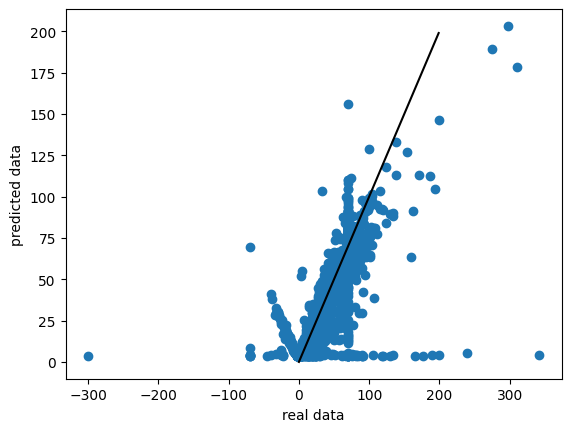

In [47]:
# # Install necessary libraries
# !pip install sklearn

# Import required modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
linear = LinearRegression()

# Fit the model to the training data (Use train_x, train_y, and linear.fit function)
### TODO: YOUR CODE HERE
X_train = np.transpose(train_x)
y_train = train_y
model = linear.fit(X_train, y_train)

# Predict the target values for the test dataset (Use linear.predict function and test_x to find y_hat)
X_test = np.transpose(test_x)

y_hat = linear.predict(X_test)  ### TODO: YOUR CODE HERE

def RMSE(true, predicted):
# Calculate the Root Mean Squared Error (RMSE) for model evaluation
  rmse = np.sqrt(mean_squared_error(test_y, y_hat))  ### TODO: YOUR CODE HERE
  return rmse

error = RMSE(test_y, y_hat)
print(f"Root Mean Squared Error (RMSE) on test data: {error:.2f}")

# Find the slope (coefficients) and intercepts
slope = model.coef_  ### TODO: YOUR CODE HERE
intercept = model.intercept_  ### TODO: YOUR CODE HERE
print(f"\nModel Coefficients: {slope}")
print(f"Model Intercept: {intercept:.2f}")

import matplotlib.pyplot as plt
# Add plots to visualize the difference between actual vs predicted values
### TODO: YOUR CODE HERE
print()
plt.scatter(test_y, y_hat)
x=np.arange(0, 200)
y=x
plt.plot(x, y, color='black')   # Same point that real and predicted.
plt.xlabel('real data')
plt.ylabel('predicted data')
plt.show()


### 3. Craft Your Linear Regression Algorithm (6pt)
Delve into the foundations of linear regression by constructing your own model to make predictions on the dataset.

While detailed annotations will guide your implementation, do not use external libraries such as scikit-learn. Using the numpy library is permitted.

Begin your exploration by understanding the closed form solution for linear regression. Subsequently, familiarize yourself with the gradient descent methodology.



In [ ]:
from numpy import *

class Linear:

    w = None

    def __init__(self, eta=0.01, epoch=100):
      self.w = None
      self.eta = eta
      self.epoch = epoch

    def setEta(self, etaVal):
      self.eta = etaVal

    def setEpoch(self, nepoch):
      self.epoch = nepoch

    def predict(self, X):
      """
      Perform inference
      """
      ### TODO: YOUR CODE HERE

    def train(self, X, Y):
      """
      Construct a vanilla linear regressor using gradient descent.
      """
      ### TODO: YOUR CODE HERE


In [ ]:
def RMSE(y_test, y_hat):
    """
    Return Root Mean Squared Error
    """
    ### TODO : YOUR CODE HERE

In [ ]:
model = Linear()

In [ ]:
model.train(train_x, train_y)

In [ ]:
y_hat = model.predict(test_x)
print(y_hat)

In [ ]:
error = RMSE(test_y, y_hat)
print(error)